In [19]:
# Standard libraries
import pandas as pd
import numpy as np
import pickle

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestRegressor

# Enable auto-reload for module reloading during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts
import scp.data_check as ch
import scp.decision_tree as dt
import scp.random_forest as rf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load dataset
assets = pd.read_csv('dataset/king_country_houses_aa.csv')

In [3]:
# Copy of the data
df = assets.copy()

In [4]:
# Selecting features 
correlated_columns = dt.selecting_features(df, corr_coef=0.25)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 



In [5]:
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=0.4)

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646


In [8]:
results_df, results_list, model_tree = rf.train_random_forest(X_train, X_test, y_train, y_test)
results_df.head()

  Model Metrics: | R2 = 0.7999 | RMSE = 172942.0715 | MAE = 91992.6531 | MSE = 29908960081.1685 |
✅ The model performs well! It explains a large portion of the variance.



,Actual Price,Predicted Price,Difference
735,365000.0,387280.50,-22280.50
2830,865000.0,812106.34,52893.66
4106,1038000.0,1154875.50,-116875.50
16218,1490000.0,1610800.00,-120800.00
19964,711000.0,785257.38,-74257.38


In [9]:
# Testing different test sizes
results_list = rf.create_train_test_splits_and_evaluate(df, correlated_columns)

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.8091 | RMSE = 166777.0138 | MAE = 90990.0963 | MSE = 27814572347.5594 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7825 | RMSE = 181334.8067 | MAE = 91277.6293 | MSE = 32882312128.0807 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.7874 | RMSE = 175184.2849 | MAE = 91380.1656 | MSE = 30689533661.68 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.7999 | RMSE = 172942.0715 | MAE = 91992.6531 | MSE = 29908960081.1685 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 50%:
  Training set size: 10806 | Test set

In [10]:
# Evaluating different test_size and features
results_df = rf.evaluate_different_correlations(df)

Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.8091 | RMSE = 166777.0138 | MAE = 90990.0963 | MSE = 27814572347.5594 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7825 | RMSE = 181334.8067 | MAE = 91277.6293 | MSE = 32882312128.0807 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.7874 | RMSE = 175184.2849 | MAE = 91380.1656 | MSE = 30689533661.68 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 40%:
  Training set size: 12967 | T

In [11]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,0.20,0.1,0.809070,166777.013847,90990.096250,2.781457e+10
1,0.20,0.2,0.782491,181334.806720,91277.629334,3.288231e+10
2,0.20,0.3,0.787419,175184.284859,91380.165613,3.068953e+10
3,0.20,0.4,0.799920,172942.071461,91992.653123,2.990896e+10
4,0.20,0.5,0.782604,179948.947999,92494.657674,3.238162e+10
5,0.25,0.1,0.809070,166777.013847,90990.096250,2.781457e+10
6,0.25,0.2,0.782491,181334.806720,91277.629334,3.288231e+10
7,0.25,0.3,0.787419,175184.284859,91380.165613,3.068953e+10
8,0.25,0.4,0.799920,172942.071461,91992.653123,2.990896e+10
9,0.25,0.5,0.782604,179948.947999,92494.657674,3.238162e+10


In [13]:
# Evaluating different test_size, features and number of trees
results_df = rf.evaluate_different_estimators(df)

Number of tree: 10
Features with correlation coefficient with price > than 0.2
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 10%:
  Training set size: 19451 | Test set size: 2162
  Model Metrics: | R2 = 0.7895 | RMSE = 175130.2935 | MAE = 95982.9073 | MSE = 30670619702.8329 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323
  Model Metrics: | R2 = 0.7727 | RMSE = 185353.7701 | MAE = 94299.4301 | MSE = 34356020092.1631 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484
  Model Metrics: | R2 = 0.7691 | RMSE = 182586.0928 | MAE = 96040.4825 | MSE = 33337681300.228 |
✅ The model performs well! It explains a large portion of the variance.

🔹 Test size 40%:
  Training

In [14]:
# A resume of metrics for test_size, features ans estimators
results_df.head(55)

,Estimator,Correlation Coefficient ≥,Test Size (%),R²,RMSE,MAE,MSE
0,10,0.20,0.1,0.789464,175130.293504,95982.907343,3.067062e+10
1,10,0.20,0.2,0.772743,185353.770105,94299.430123,3.435602e+10
2,10,0.20,0.3,0.769076,182586.092845,96040.482474,3.333768e+10
3,10,0.20,0.4,0.777194,182499.796914,96179.119325,3.330618e+10
4,10,0.25,0.1,0.789464,175130.293504,95982.907343,3.067062e+10
5,10,0.25,0.2,0.772743,185353.770105,94299.430123,3.435602e+10
6,10,0.25,0.3,0.769076,182586.092845,96040.482474,3.333768e+10
7,10,0.25,0.4,0.777194,182499.796914,96179.119325,3.330618e+10
8,50,0.20,0.1,0.801033,170250.971836,92085.774405,2.898539e+10
9,50,0.20,0.2,0.783076,181090.739648,91155.154795,3.279386e+10


In [15]:
# Cross validation
results, average = rf.cross_validate_model(df, correlated_columns)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9721
Average Test R²:  0.81
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9723,0.7730
1,2,0.9715,0.8094
2,3,0.9719,0.8160
3,4,0.9725,0.8351
4,5,0.9723,0.8165


In [17]:
#results_df = rf.perform_grid_search(df)


Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 20%:
  Training set size: 17290 | Test set size: 4323

  Number of folds 5

✅ Best R² Score: 0.8177
🏆 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


✅ Excellent model! The fit is strong.
🔹 Test size 30%:
  Training set size: 15129 | Test set size: 6484

  Number of folds 5

✅ Best R² Score: 0.8171
🏆 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


✅ Excellent model! The fit is strong.
🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646

  Number of folds 5

✅ Best R² Score: 0.8041
🏆 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


✅ Excellent model! Th

In [40]:
best_parameters = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_correlation = 0.25
best_test_size = 0.4
final_model = RandomForestRegressor(**best_parameters, random_state=42)

correlated_columns = dt.selecting_features(df, corr_coef=best_correlation)
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=best_test_size)
results_df, results_list, final_model = rf.train_random_forest(X_train, X_test, y_train, y_test, model_tree=final_model)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646
  Model Metrics: | R2 = 0.8004 | RMSE = 172748.9559 | MAE = 91815.6874 | MSE = 29842201769.608 |
✅ The model performs well! It explains a large portion of the variance.



In [41]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9711
Average Test R²:  0.8145
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9713,0.7808
1,2,0.9712,0.8140
2,3,0.9713,0.8226
3,4,0.9704,0.8351
4,5,0.9714,0.8202


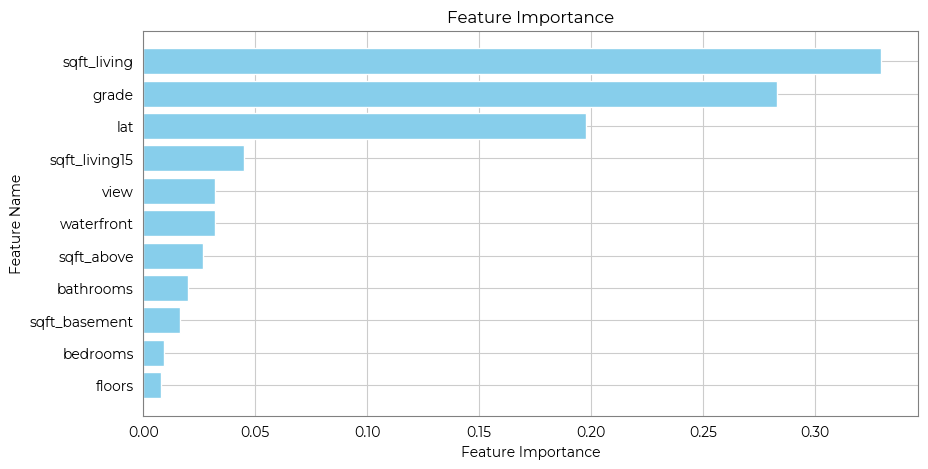

,Feature,Importance
0,sqft_living,0.329792
1,grade,0.283321
8,lat,0.197671
3,sqft_living15,0.044920
5,view,0.032196
9,waterfront,0.032039
2,sqft_above,0.026499
4,bathrooms,0.020096
6,sqft_basement,0.016390
7,bedrooms,0.009050


In [43]:
# Get feature importance scores
importance_df = dt.feature_score(final_model, X_train)
importance_df

In [48]:
# Initialize RFE and select the top 5 features
correlated_columns, results_df, final_model = dt.feature_selection(final_model, X_train, X_test, y_train, y_test, features=11)

Selected Features: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'],
      dtype='object')
  Model Metrics: | R2 = 0.8004 | RMSE = 172748.9559 | MAE = 91815.6874 | MSE = 29842201769.608 |
✅ The model performs well! It explains a large portion of the variance.



In [49]:
results_df.head(5)

,Actual Price,Predicted Price,Difference
735,365000.0,3.957498e+05,-30749.806818
2830,865000.0,8.399796e+05,25020.352980
4106,1038000.0,1.177641e+06,-139640.758814
16218,1490000.0,1.596872e+06,-106872.315000
19964,711000.0,7.727767e+05,-61776.727577


In [50]:
results, average = dt.cross_validate_model(df, correlated_columns, model_tree=final_model)
results

Cross-Validation Results:
Number of folds: 5
Average Training R²:  0.9711
Average Test R²:  0.8145
✅ The model performs well on unseen data, explaining a large portion of the variance.



,Fold,Train R²,Test R²
0,1,0.9713,0.7808
1,2,0.9712,0.8140
2,3,0.9713,0.8226
3,4,0.9704,0.8351
4,5,0.9714,0.8202


In [51]:
# Save the model
with open('house_price_random_forest_regression.pkl', 'wb') as f:
    pickle.dump(final_model, f)

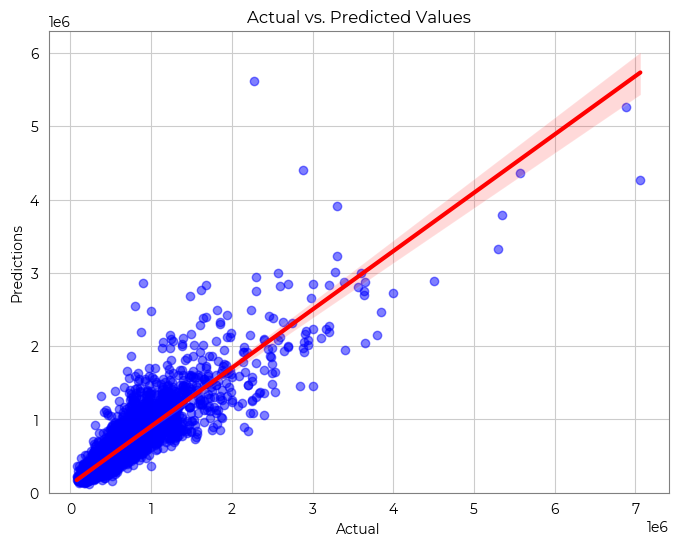

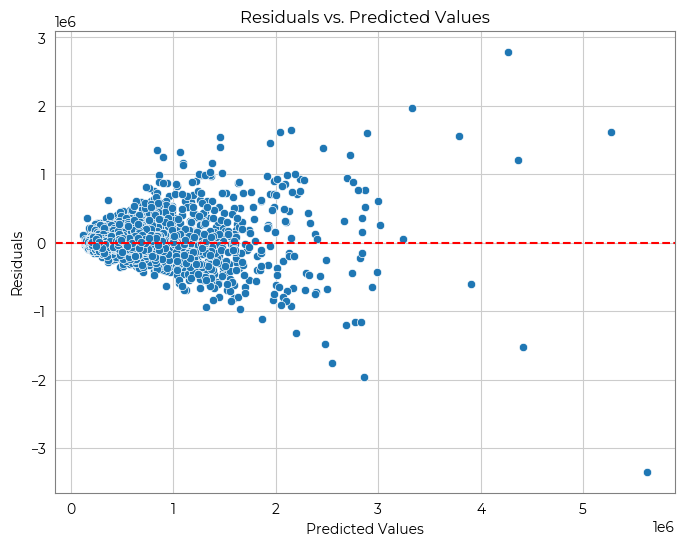

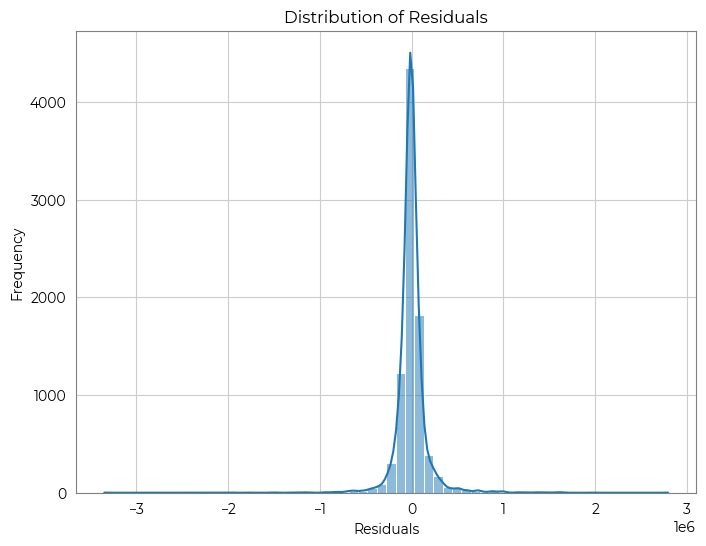

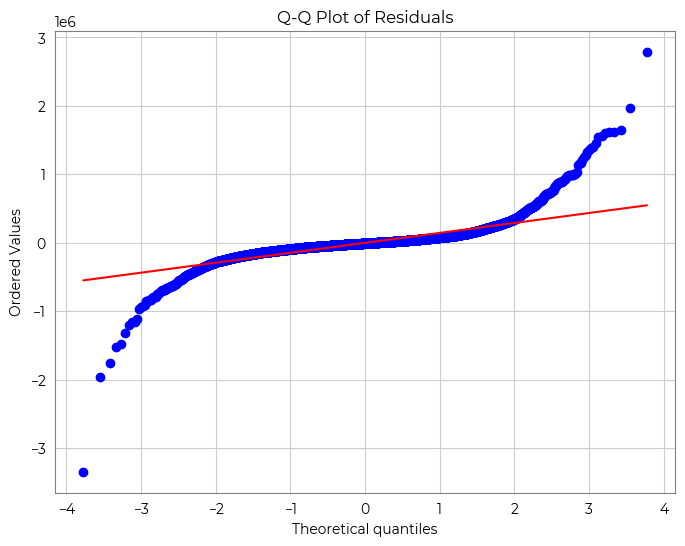

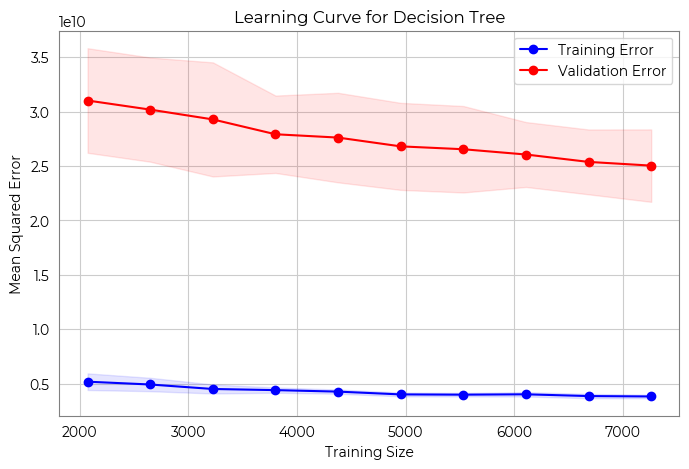

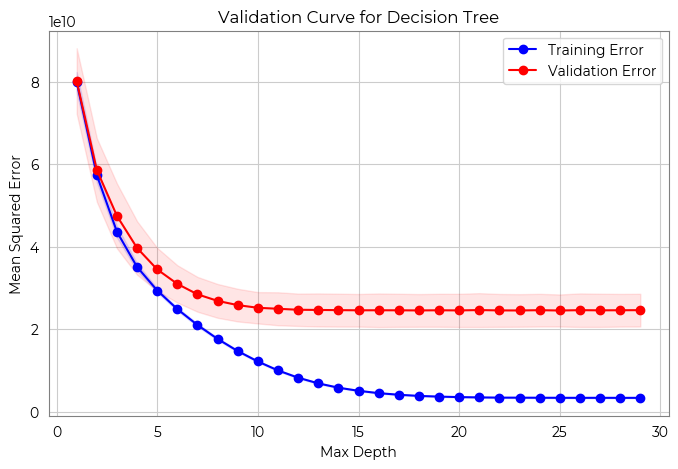

In [52]:
dt.model_validation(results_df, final_model, X_train, X_test, y_train, y_test)